In [1]:
from alethia import (
    alethia,
    get_embeddings,
    load_sentence_transformer,
    do_pca,
    plot_embedding,
    setup_matplotlib
)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

%matplotlib inline
setup_matplotlib()

In [2]:
df = pd.read_csv("../data/India_district_mappings.csv")
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


# Model 1

In [3]:
model = load_sentence_transformer("Salesforce/SFR-Embedding-Mistral")
embeddings = get_embeddings(
    df["State"].unique().tolist(), model=model, show_progress=True
)
pca = do_pca(embeddings, n_components=2)

Loading model Salesforce/SFR-Embedding-Mistral


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

GPU memory error: CUDA out of memory. Tried to allocate 224.00 MiB. GPU 0 has a total capacity of 47.41 GiB of which 106.31 MiB is free. Process 1154614 has 26.82 GiB memory in use. Including non-PyTorch memory, this process has 18.40 GiB memory in use. Of the allocated memory 18.15 GiB is allocated by PyTorch, and 1.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Trying to load model on CPU instead...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Successfully loaded model Salesforce/SFR-Embedding-Mistral on CPU
Generating Embeddings: 100%|████████████████████| 29/29 [01:16<00:00,  2.65s/it]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


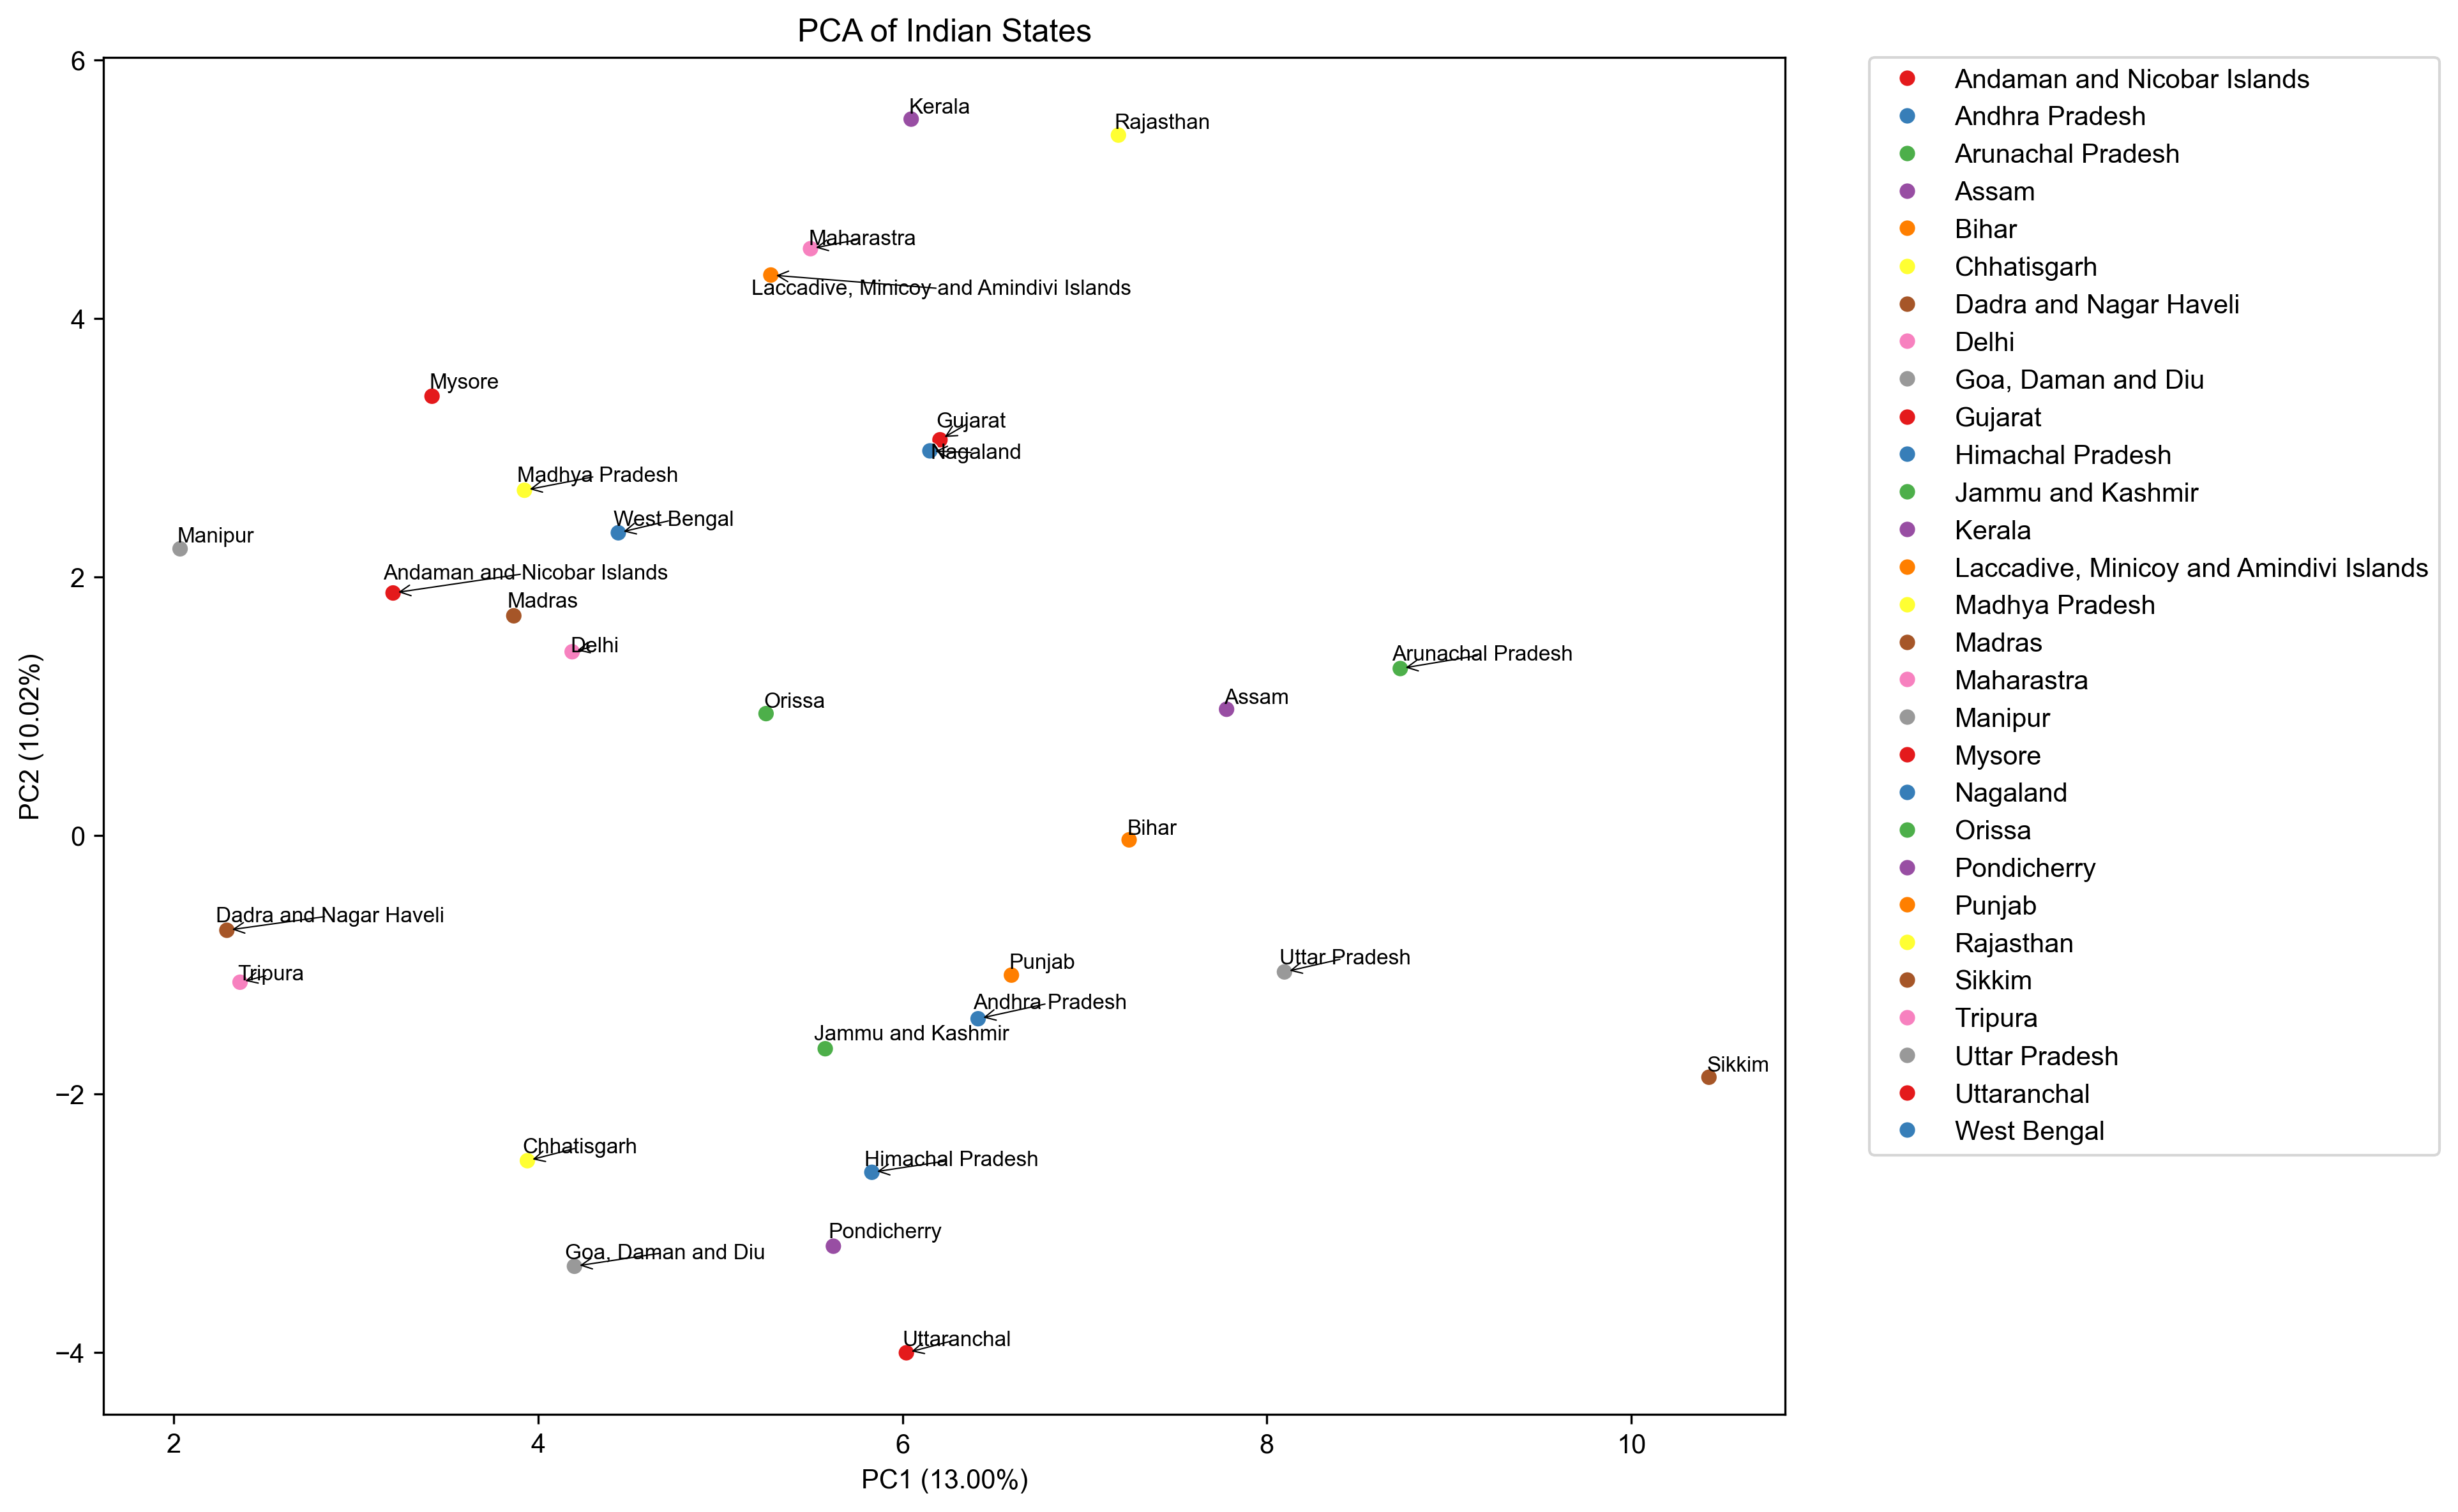

In [4]:
plt.figure(figsize=(13, 8))

plot_embedding(
    X=pca[0],
    labels=df["State"].unique().tolist(),
    title="PCA of Indian States",
    explained_var=pca[1],
    label=True,
    repel=True,
)

# Model 2

In [5]:
models = [
    "mixedbread-ai/mxbai-embed-large-v1",
    "dragonkue/snowflake-arctic-embed-l-v2.0-ko",
    "nomic-ai/nomic-embed-text-v2-moe",
    "Linq-AI-Research/Linq-Embed-Mistral",
    "Alibaba-NLP/gte-Qwen2-7B-instruct",
    "intfloat/multilingual-e5-large-instruct",
    "Salesforce/SFR-Embedding-Mistral",
    "GritLM/GritLM-7B",
    "intfloat/e5-mistral-7b-instruct",
    "Alibaba-NLP/gte-Qwen2-1.5B-instruct",
    "Lajavaness/bilingual-embedding-large",
    "Salesforce/SFR-Embedding-2_R",
    "all-MiniLM-L6-v2",
]

In [6]:
model = load_sentence_transformer("dragonkue/snowflake-arctic-embed-l-v2.0-ko")
embeddings = get_embeddings(
    df["State"].unique().tolist(), model=model, show_progress=True
)
pca = do_pca(embeddings, n_components=2)

Loading model dragonkue/snowflake-arctic-embed-l-v2.0-ko
Successfully loaded model: dragonkue/snowflake-arctic-embed-l-v2.0-ko


Generating Embeddings: 100%|████████████████████| 29/29 [00:00<00:00, 37.52it/s]


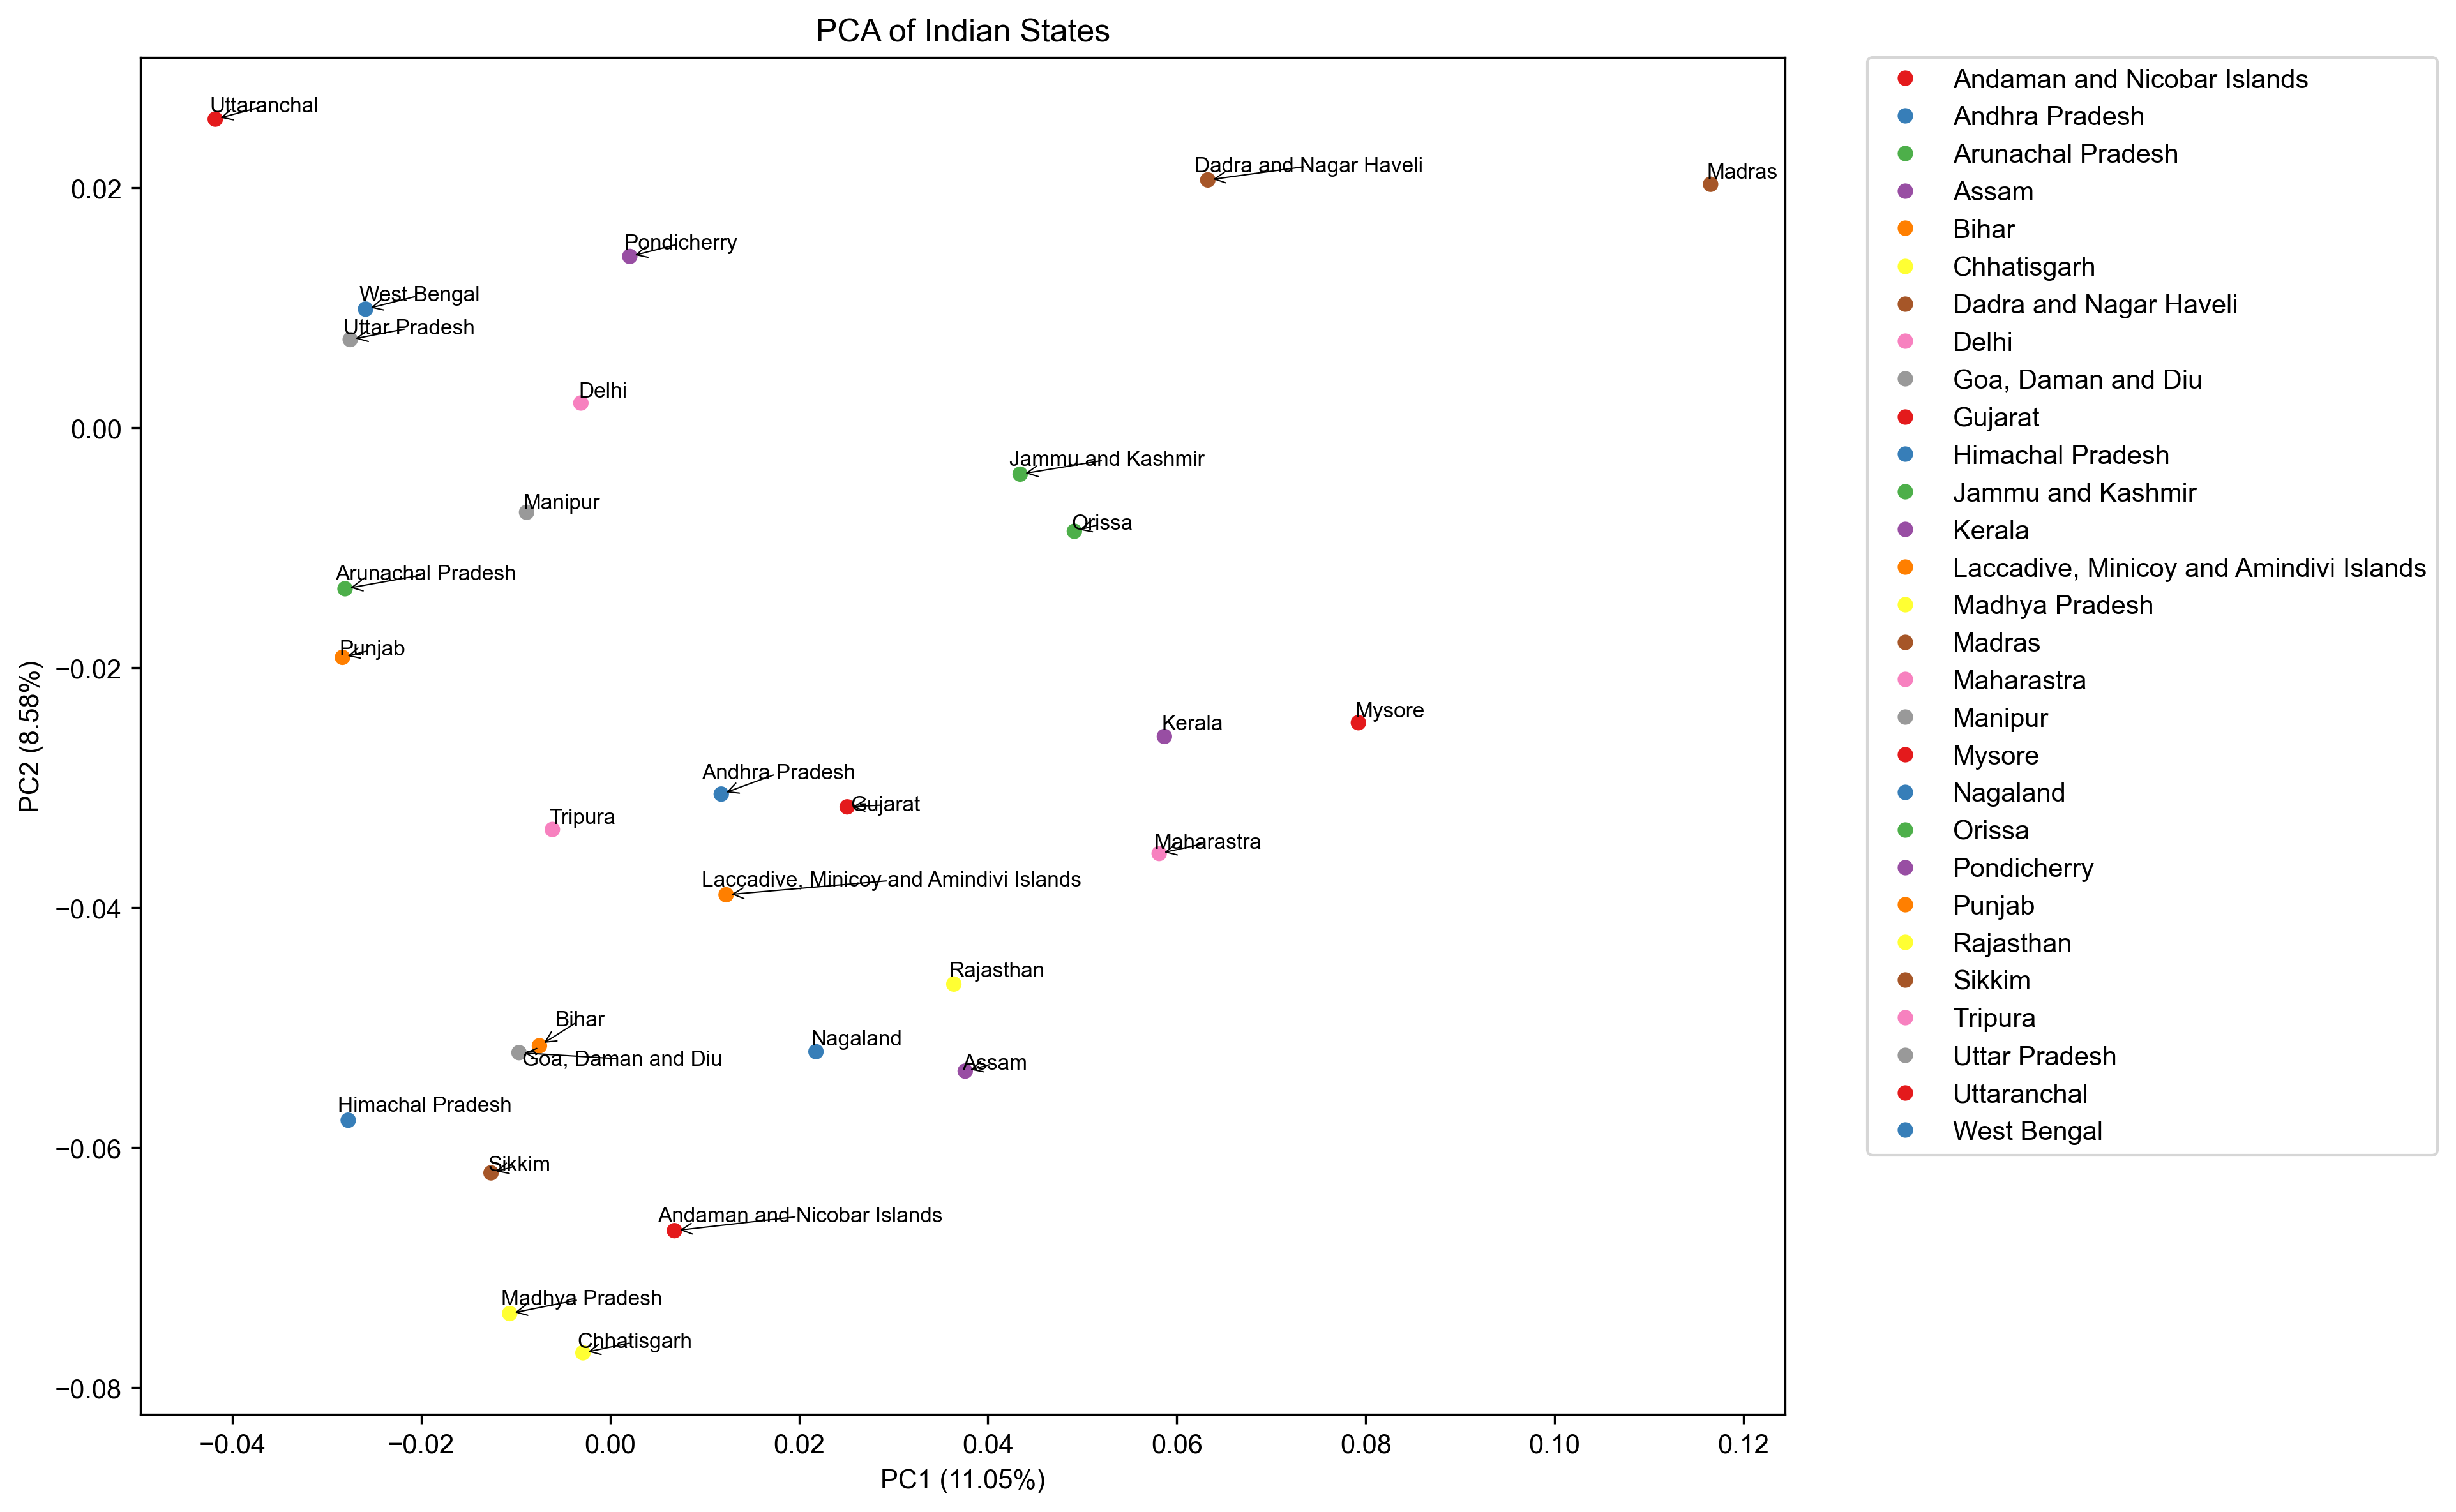

In [7]:
plt.figure(figsize=(13, 8))

plot_embedding(
    X=pca[0],
    labels=df["State"].unique().tolist(),
    title="PCA of Indian States",
    explained_var=pca[1],
    label=True,
    repel=True,
)